In [108]:
import pandas as pd 
file = pd.read_csv("BATS_TSLA, 1W-5.csv")

In [278]:
import pandas as pd

# Dictionary for stock files
trading_view_files = {
    'TSLA': "BATS_TSLA, 1W-5.csv",
    'AMZN': "BATS_AMZN, 1W.csv",
    'COIN': "BATS_COIN, 1W.csv",
    'NVDA': "BATS_NVDA, 1W.csv"
}

def choose_and_load_stock(file_dict):
 
    print("Available stocks:")
    for key in file_dict.keys():
        print(f"- {key}")
    
    # Prompt user to choose a stock
    choice = input("Enter the stock symbol (e.g., TSLA): ").upper()
    
    if choice in file_dict:
        file_path = file_dict[choice]
        try:
            # Load the selected stock's CSV file
            df = pd.read_csv(file_path)
            print(f"{choice} file successfully loaded with {df.shape[0]} rows and {df.shape[1]} columns.")
            return df
        except FileNotFoundError:
            print(f"Error: The file for {choice} was not found.")
        except pd.errors.EmptyDataError:
            print(f"Error: The file for {choice} is empty.")
        except Exception as e:
            print(f"An error occurred while loading {choice}: {e}")
    else:
        print("Invalid choice. Please choose a valid stock symbol.")
        return None


In [314]:
def cleaning_file(file):
 
    df = file 
    df = df.drop(df.columns[-1] , axis = 1 )
    df = df.drop(df.columns[8],axis = 1)
    df = df.drop(df.columns[8], axis = 1)
    df = df.drop(df.columns[2], axis = 1)
    df = df.drop(df.columns[2], axis = 1)
    df = df.drop(df.columns[6], axis = 1)
    df = df.drop(df.columns[6], axis = 1)
    return df

    

In [274]:
import pandas as pd
def investing_table(df):
    change = []
    for i in range(0,300):
        starting_price = df.iloc[i,1]
        closing_price = df.iloc[i,2]
        numerator = closing_price - starting_price
        denom = starting_price
        equation = numerator / denom
        change.append(equation * 100)
        
    investments = {'weeks': range(1, 301) , 'Change': [0] * 300 , 'investment': [0] * 300 }
    data = pd.DataFrame(investments)
    data['Change'] = change
    
    for i in range(300):
        if data.iloc[i,1] <= -3 : 
            data.iloc[i,2] = 1
            
    closing_prices_column = df['close']
    data['Prices'] = closing_prices_column
    investment_value = 0 
    data['Shares Bought'] = 0
    
    for i in range(300):
        if data.loc[i, 'investment'] == 1:  
            data.loc[i, 'Shares Bought'] = 1000 / data.loc[i, 'Prices'] 
        
    return data

In [316]:
trading_view_files = {
    'TSLA': "BATS_TSLA, 1W-5.csv",
    'AMZN': "BATS_AMZN, 1W.csv",
    'COIN': "BATS_COIN, 1W.csv",
    'NVDA': "BATS_NVDA, 1W.csv"
}

a = choose_and_load_stock(trading_view_files)

Available stocks:
- TSLA
- AMZN
- COIN
- NVDA


Enter the stock symbol (e.g., TSLA):  TSLA


TSLA file successfully loaded with 300 rows and 16 columns.


In [318]:
a

,time,open,high,low,close,Volume,RSI,RSI-based MA,Regular Bullish,Regular Bullish Label,Regular Bearish,Regular Bearish Label,MACD,Signal Line,Histogram,Cross
0,2019-03-11,18.901314,19.692647,18.293315,18.361982,654452331.0,41.503854,48.362884,NaN,NaN,NaN,NaN,-0.512826,-0.077448,-0.435377,NaN
1,2019-03-18,18.399982,18.536648,17.563982,17.635316,655238769.0,39.382244,46.928552,NaN,NaN,NaN,NaN,-0.673539,-0.192455,-0.481084,NaN
2,2019-03-25,17.313983,18.688648,16.963983,18.657315,586659194.0,43.738271,46.497354,NaN,NaN,NaN,NaN,-0.710251,-0.290518,-0.419733,NaN
3,2019-04-01,18.841314,19.744647,17.372649,18.330648,874174306.0,42.682476,45.807424,NaN,NaN,NaN,NaN,-0.756979,-0.386048,-0.370930,NaN
4,2019-04-08,18.512648,18.743981,17.706649,17.846649,599365827.0,41.099485,45.226490,NaN,NaN,NaN,NaN,-0.823572,-0.479008,-0.344564,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024-11-04,244.560000,328.710000,238.880000,321.220000,625405564.0,68.191076,57.031480,NaN,NaN,NaN,NaN,18.432812,11.208851,7.223961,NaN
296,2024-11-11,346.300000,358.640000,309.220000,320.720000,726819635.0,68.056796,58.362046,NaN,NaN,NaN,NaN,22.851527,12.998880,9.852647,NaN
297,2024-11-18,340.730000,361.530000,330.010000,352.560000,428892998.0,71.857251,59.623517,NaN,NaN,NaN,NaN,28.593010,15.266382,13.326627,NaN
298,2024-11-25,360.140000,361.930000,326.590000,345.160000,253250816.0,69.779338,60.652248,NaN,NaN,NaN,NaN,32.175163,17.619684,14.555479,NaN


In [320]:
data_frame = cleaning_file(a)

In [322]:
data_frame

,time,open,close,Volume,RSI,RSI-based MA,MACD,Signal Line,Histogram
0,2019-03-11,18.901314,18.361982,654452331.0,41.503854,48.362884,-0.512826,-0.077448,-0.435377
1,2019-03-18,18.399982,17.635316,655238769.0,39.382244,46.928552,-0.673539,-0.192455,-0.481084
2,2019-03-25,17.313983,18.657315,586659194.0,43.738271,46.497354,-0.710251,-0.290518,-0.419733
3,2019-04-01,18.841314,18.330648,874174306.0,42.682476,45.807424,-0.756979,-0.386048,-0.370930
4,2019-04-08,18.512648,17.846649,599365827.0,41.099485,45.226490,-0.823572,-0.479008,-0.344564
...,...,...,...,...,...,...,...,...,...
295,2024-11-04,244.560000,321.220000,625405564.0,68.191076,57.031480,18.432812,11.208851,7.223961
296,2024-11-11,346.300000,320.720000,726819635.0,68.056796,58.362046,22.851527,12.998880,9.852647
297,2024-11-18,340.730000,352.560000,428892998.0,71.857251,59.623517,28.593010,15.266382,13.326627
298,2024-11-25,360.140000,345.160000,253250816.0,69.779338,60.652248,32.175163,17.619684,14.555479


In [328]:
c = investing_table(data_frame)

/var/folders/h0/57r9_9qn4059bk_s7qs7mhj00000gn/T/ipykernel_61370/4267588175.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '56.704399286068934' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, 'Shares Bought'] = 1000 / data.loc[i, 'Prices']


In [330]:
c

,weeks,Change,investment,Prices,Shares Bought
0,1,-2.853410,0,18.361982,0.000000
1,2,-4.155798,1,17.635316,56.704399
2,3,7.758654,0,18.657315,0.000000
3,4,-2.710352,0,18.330648,0.000000
4,5,-3.597535,1,17.846649,56.032928
...,...,...,...,...,...
295,296,31.346091,0,321.220000,0.000000
296,297,-7.386659,1,320.720000,3.117985
297,298,3.471957,0,352.560000,0.000000
298,299,-4.159494,1,345.160000,2.897207


In [340]:
value = []
number_of_shares = 0
for i in range(300):
    number_of_shares = number_of_shares + c.iloc[i,4]
    investment_value = c.iloc[i,3] * number_of_shares
    value.append(investment_value)
value

[0.0,
 1000.0,
 1057.9518393659632,
 1039.428383364381,
 2011.9835108143227,
 2053.771405002162,
 2767.268540093389,
 3001.346051074218,
 3818.8150595148986,
 4364.58152409781,
 4942.66291481862,
 5800.836635301116,
 6406.735174789818,
 6733.181051284358,
 6950.60267245802,
 7000.728453570334,
 7302.737859044678,
 7678.0566775796115,
 8088.463918838873,
 8144.214242147445,
 8369.212499471245,
 8393.141064137631,
 8854.931304155552,
 9511.105057430963,
 10150.428107407426,
 10233.2112483393,
 11031.802053657755,
 10825.743123146029,
 10893.679881890823,
 11412.27552966319,
 12223.950842787866,
 12670.717991770403,
 16180.745577113124,
 16449.94177508068,
 17701.106271500816,
 18490.237262060495,
 18485.84025808799,
 19313.770901718628,
 19662.06713335248,
 20979.155059099954,
 23742.111463535104,
 25193.249175497207,
 25932.57414597482,
 27989.572707687996,
 29883.251379669942,
 33062.99351159609,
 38082.56031043494,
 43789.93898051611,
 46831.53342392939,
 52742.03704157044,
 40102.278

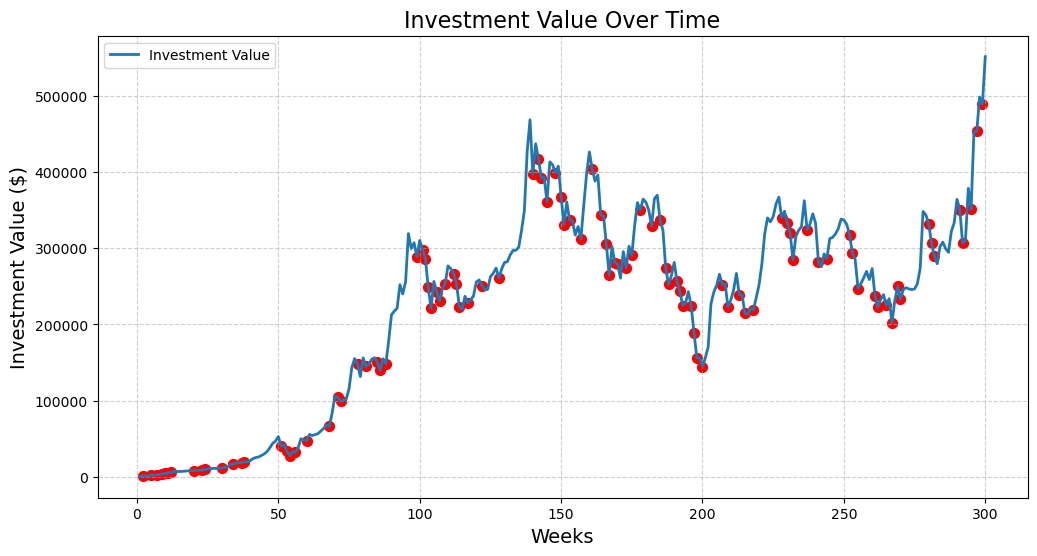

In [342]:
import matplotlib.pyplot as plt

def plot_investment_growth(values, investments, weeks):
    """
    Plots the growth of investment over time and marks the points where $1000 was added.
    
    Parameters:
        values (list): Array of investment values.
        investments (list): Array indicating whether an investment was made (1 for yes, 0 for no).
        weeks (list): Array of week numbers.
    """
    plt.figure(figsize=(12, 6))
    
    # Plot the investment values
    plt.plot(weeks, values, label="Investment Value", linewidth=2)
    
    # Highlight points where $1000 was added
    for i, invest in enumerate(investments):
        if invest == 1:  # Mark where investment was made
            plt.scatter(weeks[i], values[i], color='red', label="Added $1000" if i == 0 else "", s=50)

    # Chart styling
    plt.title("Investment Value Over Time", fontsize=16)
    plt.xlabel("Weeks", fontsize=14)
    plt.ylabel("Investment Value ($)", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Example usage with your arrays
plot_investment_growth(value, c['investment'].tolist(), c['weeks'].tolist())
